# Proyek Sistem Rekomendasi: [Movie Recommender System Dataset]
- **Nama:** [Naia Shaffa Camila]
- **Email:** [naiashaffa@gmail.com]
- **ID Dicoding:** [MC015D5X2145]

### Import Library

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.path.join(os.getcwd(), '.kaggle')

import pandas as pd
import numpy as np 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Data Load

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.dataset_download_files('gargmanas/movierecommenderdataset', path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset


### EDA

In [3]:
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
count_no_genres = movies[movies['genres'].str.contains(r'\(no genres listed\)')].shape[0]
print(f"Jumlah film dengan '(no genres listed)': {count_no_genres}")


Jumlah film dengan '(no genres listed)': 34


In [6]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
movies.duplicated(subset=['movieId']).sum()

np.int64(0)

In [8]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

Insights : 
- Terdapat 9742 baris (records) dalam dataset movies.
- Terdapat 3 kolom yaitu: movieId, title, genres
- Tidak terdapat duplikat berdasarkan banyak baris dalam DataFrame movies yang memiliki movieId yang sama.
- Tidak memiliki missing value.

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
ratings.duplicated(subset=['userId', 'movieId']).sum()

np.int64(0)

In [13]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Insights :
- Terdapat 100.836 baris (records) dalam dataset
- Terdapat 4 kolom yaitu: userId, moviesId, rating, dan timestamp
- Rating memiliki nilai terendah 0.5 dan tertinggi 5.
- Tidak terdapat duplikat berdasarkan banyak baris dalam DataFrame ratings yang memiliki userId dan movieId yang sama.
- Tidak memiliki missing value.

In [14]:
print("Jumlah user dalam dataset: ", ratings.userId.nunique())
print("-"*50)

# Number of Movies in the dataset:
print("Jumlah film dalam dataset:", movies.title.nunique())
print("-"*71)

# Unique of Rating points in the dataset:
print("Nilai unik pada kolom rating:", ratings.rating.unique())

Jumlah user dalam dataset:  610
--------------------------------------------------
Jumlah film dalam dataset: 9737
-----------------------------------------------------------------------
Nilai unik pada kolom rating: [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


C:\Users\loq\AppData\Local\Temp\ipykernel_15500\3908836756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='muted')


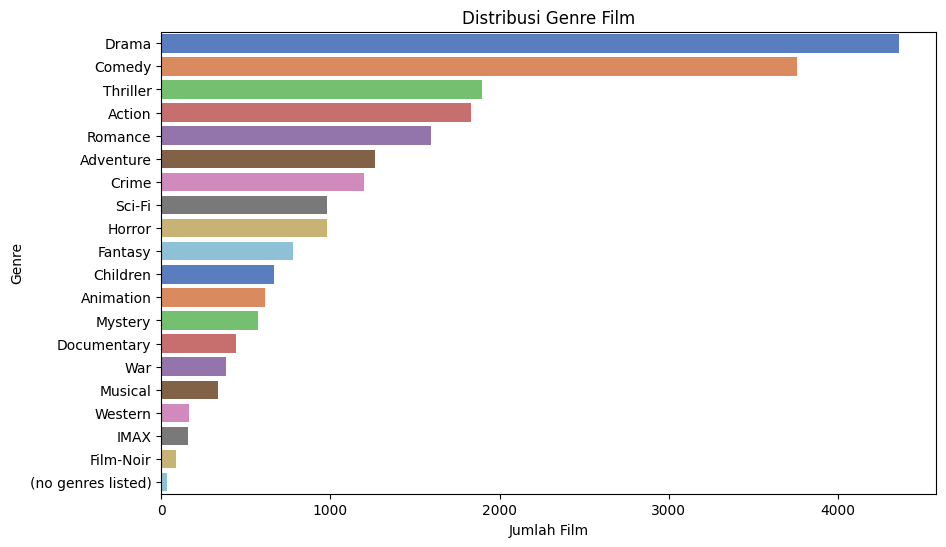

In [15]:
# Visualisasi distribusi genre film
genre_count = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='muted')
plt.title('Distribusi Genre Film')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

C:\Users\loq\AppData\Local\Temp\ipykernel_15500\4171513355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


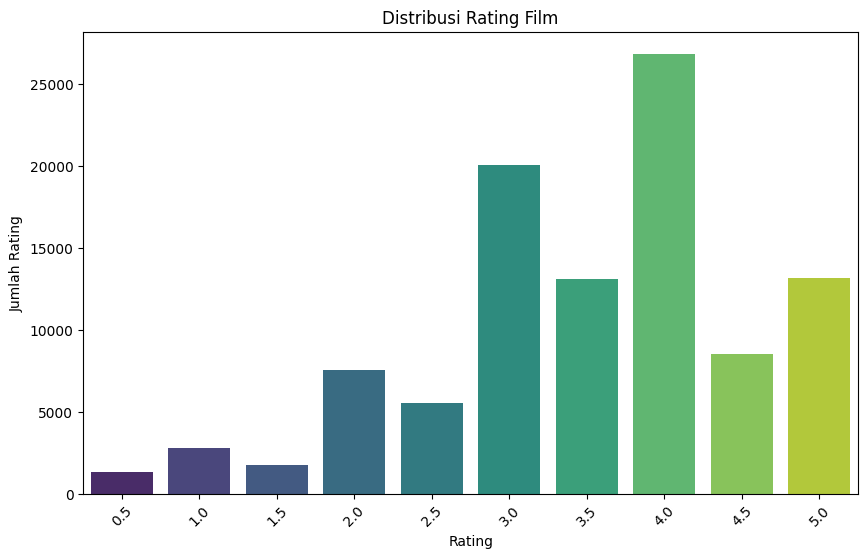

In [16]:
# Visualisasi distribusi rating
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45)
plt.show()

## Content-based Filtering

Metode ini merekomendasikan berdasarkan kesamaan fitur (genre).

### Data Preparation

Memakai movies dataset karena content-based filtering fokus pada fitur genre

In [17]:
movies_df = movies.copy()

In [18]:
movies_df.shape

(9742, 3)

In [19]:
movies[movies['genres'].str.contains('(no genres listed)')]

C:\Users\loq\AppData\Local\Temp\ipykernel_15500\872586236.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movies[movies['genres'].str.contains('(no genres listed)')]


,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [20]:
count_no_genres = movies_df[movies_df['genres'].str.contains(r'\(no genres listed\)')].shape[0]
print(f"Jumlah film dengan '(no genres listed)': {count_no_genres}")

Jumlah film dengan '(no genres listed)': 34


In [21]:
genre_dummies = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genre_dummies], axis=1)

Hapus baris yang memiliki genre '(non genres listed)'

In [22]:
# Menghapus baris dengan genre '(no genres listed)'
movies_df = movies_df[~movies_df['genres'].str.contains(r'\(no genres listed\)')]

In [23]:
# Cek
movies_df.shape

(9708, 23)

Catatan :

Hasil sudah sesuai.
- Data awal sebanyak 9742 baris
- Jumlah film dengan '(no genres listed)': 34
- Setelah baris dengan genre '(no genres listed)' dihapus : 9708

Menghapus kolom '(no genres listed)'

In [24]:
# Menghapus kolom '(no genres listed)'
movies_df.drop('(no genres listed)', axis=1, inplace=True)

In [25]:
movies_df.shape

(9708, 22)

In [26]:
movies_df.columns

Index(['movieId', 'title', 'genres', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

Catatan :
- kolom '(no genres listed)' berhasil dihapus.
- Terdapat 22 kolom.

### Model Development

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

genre_features = movies_df.iloc[:, 3:]

cosine_sim = cosine_similarity(genre_features)
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [28]:
def similarity_score_precision(title, cosine_sim, df, top_n=10, threshold=0.5):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    scores = [score for _, score in sim_scores]
    relevant = [s for s in scores if s >= threshold]
    return len(relevant) / top_n

def precision_genre(base_genres, recommended_genres):
    base_set = set(base_genres.split('|'))
    count = 0
    for rec_genre in recommended_genres:
        rec_set = set(rec_genre.split('|'))
        if base_set & rec_set:
            count += 1
    return count / len(recommended_genres)


In [29]:
def recommend_movies(title, cosine_sim, df, top_n=10):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]
    return df.iloc[recommended_indices][['title', 'genres']]

In [30]:
# Pilih judul film yang ingin diuji
movie_title = "Toy Story (1995)"

movie_genre = movies_df.loc[movies_df['title'] == movie_title, 'genres'].values[0]
movie_id = movies_df.loc[movies_df['title'] == movie_title, 'movieId'].values[0]
genre_list = movie_genre.split('|')

recommend_df = recommend_movies(movie_title, cosine_sim, movies_df)

print("REKOMENDASI FILM BERDASARKAN GENRE:")
print("-" * 50)
print(f"Judul: {movie_title}")
print(f"MovieId: {movie_id}")
print(f"Genre: {movie_genre}")
print("-" * 50)
print("TOP 10 REKOMENDASI FILM :")
recommend_df


REKOMENDASI FILM BERDASARKAN GENRE:
--------------------------------------------------
Judul: Toy Story (1995)
MovieId: 1
Genre: Adventure|Animation|Children|Comedy|Fantasy
--------------------------------------------------
TOP 10 REKOMENDASI FILM :


,title,genres
1706,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy
2355,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
2809,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3000,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
3568,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
6194,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy
6486,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
6948,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy
7760,Asterix and the Vikings (Astérix et les Viking...,Adventure|Animation|Children|Comedy|Fantasy
8219,Turbo (2013),Adventure|Animation|Children|Comedy|Fantasy


In [31]:
def genre_precision(input_genres, rec_genres):
    input_set = set(input_genres.split('|'))
    rec_set = set(rec_genres.split('|'))
    intersection = input_set.intersection(rec_set)
    precision = len(intersection) / len(rec_set) if len(rec_set) > 0 else 0
    return precision

target_title = "Toy Story (1995)"
target_idx = movies_df[movies_df['title'] == target_title].index[0]
target_genres = movies_df.loc[target_idx, 'genres']

similarities = cosine_sim[target_idx]

sim_scores = list(enumerate(similarities))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

recommendations = []

for i, score in sim_scores:
    rec_title = movies_df.iloc[i]['title']
    rec_genres = movies_df.iloc[i]['genres']
    prec = genre_precision(target_genres, rec_genres)
    recommendations.append({
        'Rekomendasi Film': rec_title,
        'Cosine Similarity': round(score, 4),
        'Genre Rekomendasi': rec_genres,
        'Precision Genre': round(prec, 4)
    })

df_recommendations = pd.DataFrame(recommendations)

print(f"Objek Film Pencarian: {target_title}")
print(f"Genre Film Pencarian: {target_genres}")
print("="*70)
print(df_recommendations)

Objek Film Pencarian: Toy Story (1995)
Genre Film Pencarian: Adventure|Animation|Children|Comedy|Fantasy
                                    Rekomendasi Film  Cosine Similarity  \
0                                        Antz (1998)                1.0   
1                                 Toy Story 2 (1999)                1.0   
2     Adventures of Rocky and Bullwinkle, The (2000)                1.0   
3                   Emperor's New Groove, The (2000)                1.0   
4                              Monsters, Inc. (2001)                1.0   
5                                   Wild, The (2006)                1.0   
6                             Shrek the Third (2007)                1.0   
7                     Tale of Despereaux, The (2008)                1.0   
8  Asterix and the Vikings (Astérix et les Viking...                1.0   
9                                       Turbo (2013)                1.0   

                             Genre Rekomendasi  Precision Genre  
0  

In [32]:
precision_sim = similarity_score_precision(movie_title, cosine_sim, movies_df, top_n=10, threshold=0.5)
precision_gen = precision_genre(movie_genre, recommend_df['genres'].values)

print("\nEvaluasi Presisi:")
print("Presisi berdasarkan similarity score:", round(precision_sim, 2))
print("Presisi berdasarkan genre:", round(precision_gen, 2))


Evaluasi Presisi:
Presisi berdasarkan similarity score: 1.0
Presisi berdasarkan genre: 1.0


Insight :
- Cosine Similarity: skor kemiripan berdasarkan encoding genre.
- Precision Genre: proporsi genre rekomendasi yang sama dengan film input, dari 0 sampai 1.
- Kalau precision genre 1.0 artinya genre rekomendasi 100% sama dengan genre film input.

## Collaborative Filtering

Metode ini merekomendasikan berdasarkan items dari pengguna lain.

### Data Preparation

#### Merge dataset

In [33]:
df = pd.merge(ratings, movies, on='movieId')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


Membentuk User-Item Matrix

In [35]:
user_item_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')

In [36]:
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
user_item_matrix = user_item_matrix.fillna(0)

In [38]:
user_item_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Development

##### Menggunakan NearestNeighbors algorithm

In [39]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute', n_jobs=-1)
knn.fit(user_item_matrix.values.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [40]:
avg_ratings = df.groupby('movieId')['rating'].mean().to_dict()

def get_similar_movies(movie_id, movie_titles, user_item_matrix, avg_ratings, n=10):
    if movie_id not in user_item_matrix.columns:
        return f"Movie ID {movie_id} not found in matrix."

    movie_idx = list(user_item_matrix.columns).index(movie_id)
    distances, indices = knn.kneighbors(
        user_item_matrix.values.T[movie_idx].reshape(1, -1), n_neighbors=n+1
    )

    similar_movies = []
    for i in range(1, len(distances[0])):
        sim_movie_id = user_item_matrix.columns[indices[0][i]]
        distance = distances[0][i]
        similarity = 1 - distance
        avg_rating = avg_ratings.get(sim_movie_id, np.nan)
        similar_movies.append((sim_movie_id, movie_titles.get(sim_movie_id, "Unknown Title"), similarity, round(avg_rating, 2)))

    return pd.DataFrame(similar_movies, columns=["movieId", "title", "similarity", "avg_rating"]).sort_values(by="similarity", ascending=False)


In [41]:
target_movie_id = 1
movie_info = movies[movies['movieId'] == target_movie_id]

if not movie_info.empty:
    target_title = movie_info.iloc[0]['title']
    target_genres = movie_info.iloc[0]['genres']
    target_rating = round(avg_ratings.get(target_movie_id, np.nan), 2)

    similar = get_similar_movies(target_movie_id, movies.set_index('movieId')['title'].to_dict(), user_item_matrix, avg_ratings, n=10)

    print(f"🎯 Objek Film Pencarian")
    print(f"   Judul   : {target_title}")
    print(f"   Genre   : {target_genres}")
    print(f"   Rating  : {target_rating}\n")

    print("🔍 10 Film yang Mirip:")
    print(similar)
else:
    print(f"Film dengan movieId = {target_movie_id} tidak ditemukan.")

🎯 Objek Film Pencarian
   Judul   : Toy Story (1995)
   Genre   : Adventure|Animation|Children|Comedy|Fantasy
   Rating  : 3.92

🔍 10 Film yang Mirip:
   movieId                                              title  similarity  \
0     3114                                 Toy Story 2 (1999)    0.572601   
1      480                               Jurassic Park (1993)    0.565637   
2      780               Independence Day (a.k.a. ID4) (1996)    0.564262   
3      260          Star Wars: Episode IV - A New Hope (1977)    0.557388   
4      356                                Forrest Gump (1994)    0.547096   
5      364                              Lion King, The (1994)    0.541145   
6     1210  Star Wars: Episode VI - Return of the Jedi (1983)    0.541089   
7      648                         Mission: Impossible (1996)    0.538913   
8     1265                               Groundhog Day (1993)    0.534169   
9     1270                          Back to the Future (1985)    0.530381   

 

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict_rating(user_id, movie_id, user_item_matrix, knn_model):
    if movie_id not in user_item_matrix.columns or user_id not in user_item_matrix.index:
        return np.nan

    movie_idx = list(user_item_matrix.columns).index(movie_id)
    distances, indices = knn_model.kneighbors(user_item_matrix.values.T[movie_idx].reshape(1, -1), n_neighbors=6)

    total_sim = 0
    weighted_sum = 0

    for i in range(1, len(distances[0])):  
        sim_movie_idx = indices[0][i]
        sim_movie_id = user_item_matrix.columns[sim_movie_idx]
        similarity = 1 - distances[0][i]

        if not np.isnan(user_item_matrix.loc[user_id, sim_movie_id]):
            rating = user_item_matrix.loc[user_id, sim_movie_id]
            weighted_sum += similarity * rating
            total_sim += similarity

    if total_sim == 0:
        return np.nan
    return weighted_sum / total_sim

sample_df = df.sample(100, random_state=42)

predicted_ratings = []
actual_ratings = []

for row in sample_df.itertuples():
    pred = predict_rating(row.userId, row.movieId, user_item_matrix, knn)
    if not np.isnan(pred):
        predicted_ratings.append(pred)
        actual_ratings.append(row.rating)

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print("Evaluasi Model KNN Collaborative Filtering")
print("RMSE:", round(rmse, 4))
print("MAE :", round(mae, 4))


Evaluasi Model KNN Collaborative Filtering
RMSE: 2.1126
MAE : 1.73


Insight :
- Menggunakan algortima NearestNeighbors
- Similarity di kisaran ~0.53 - 0.57 menunjukkan film-film ini mirip secara pola rating user 